<a href="https://colab.research.google.com/github/Debanjana-github/OpenCv/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

E-commerce product review sentiment analysis (Amazon reviews sentiment analysis)

From here you can get the dataset-
https://www.kaggle.com/code/mutyaqurratuayuni/amazon-review-sentiment-analysis/input

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [3]:
df=pd.read_csv("/content/amazon_reviews.csv")
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [4]:
df.shape

(4915, 12)

In [5]:
df.dtypes

Unnamed: 0                int64
reviewerName             object
overall                   int64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object

In [6]:
df.isnull().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Unnamed: 0              0
reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

Text(0, 0.5, 'Frequency')

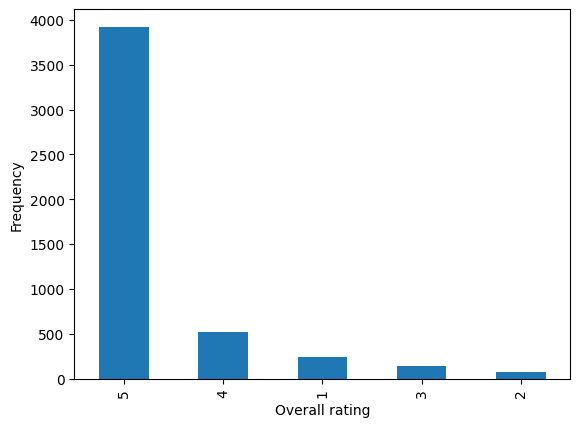

In [9]:
df.overall.value_counts().plot(kind='bar')
plt.xlabel("Overall rating")
plt.ylabel("Frequency")

In [10]:
#Creating three categories for reviews : Positive(4-5), Negative(1-2), Neutral(3)
def sentiment(label):
  if label==5.0 or label==4.0:
    return "Positive"
  elif label==3.0:
    return "Neutral"
  elif label==1.0 or label==2.0:
    return "Negative"

In [11]:
df['overall']=df['overall'].apply(sentiment)

In [12]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,1,0mie,Positive,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,Positive,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,Positive,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,Positive,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0
5,5,2Cents!,Positive,It's mini storage. It doesn't do anything els...,29-04-2013,588,0,0,0,0,0.0,0.0


Text(0, 0.5, 'Frequency')

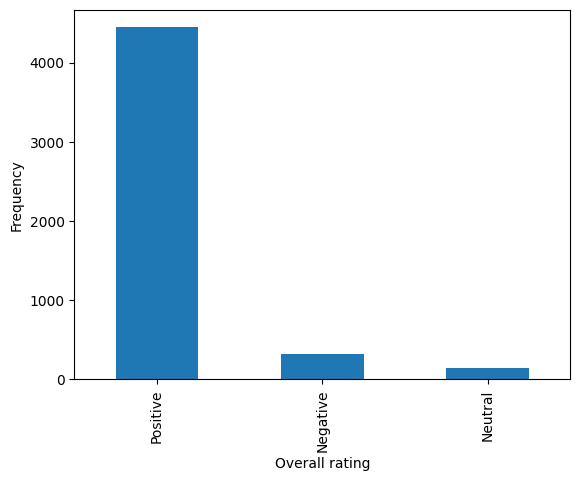

In [13]:
df.overall.value_counts().plot(kind='bar')
plt.xlabel("Overall rating")
plt.ylabel("Frequency")

Tokenization

In [16]:
# Bag of words model for analysis.tokenize the text
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [17]:
token=RegexpTokenizer(r"[a-zA-Z0-9]+")
cv=CountVectorizer(stop_words="english",ngram_range=(1,1),tokenizer=token.tokenize)
text_counts=cv.fit_transform(df['reviewText'])
text_counts

<4913x8230 sparse matrix of type '<class 'numpy.int64'>'
	with 106363 stored elements in Compressed Sparse Row format>

WORD CLOUD

In [18]:
pos_comments = df[df.overall == 'Positive']

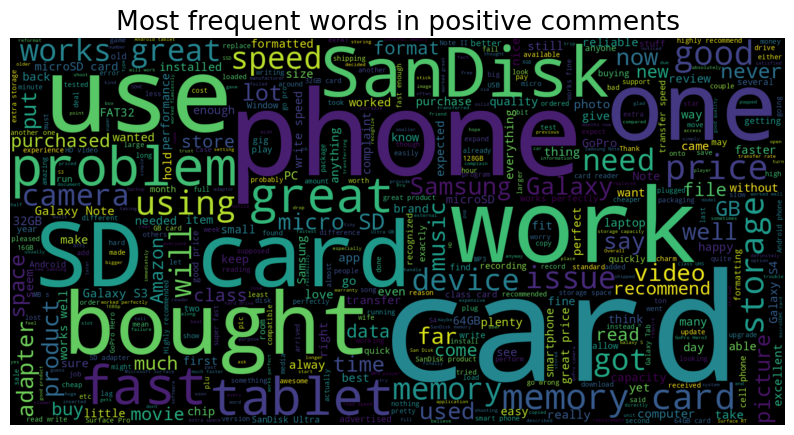

In [19]:
from wordcloud import WordCloud
text = ' '.join([word for word in pos_comments['reviewText']])
plt.figure(figsize = (10,10), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive comments', fontsize=19)
plt.show()


In [20]:
neu_comments = df[df.overall == 'Neutral']

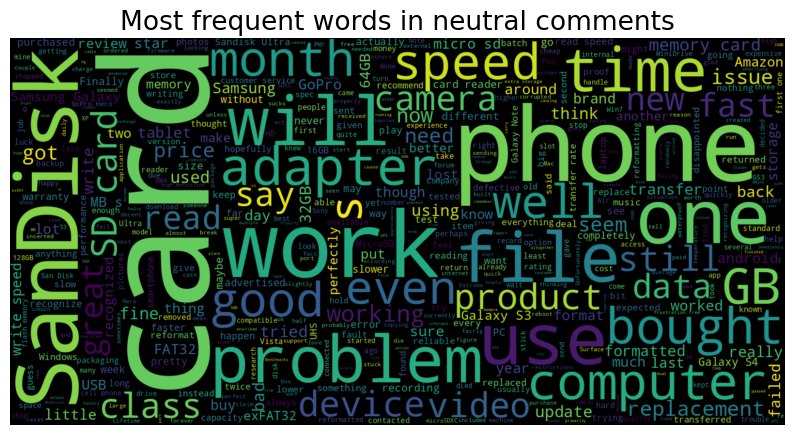

In [21]:
text = ' '.join([word for word in neu_comments['reviewText']])
plt.figure(figsize = (10,10), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in neutral comments', fontsize=19)
plt.show()

In [22]:
neg_comments = df[df.overall == 'Negative']

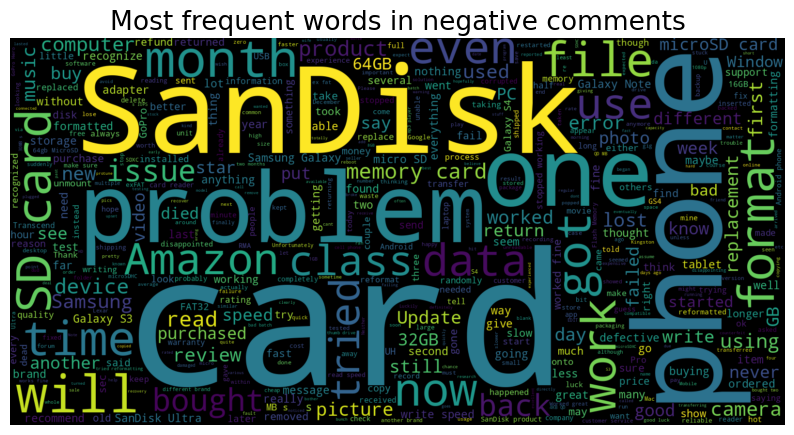

In [24]:
text = ' '.join([word for word in neg_comments['reviewText']])
plt.figure(figsize = (10,10), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative comments', fontsize=19)
plt.show()

VADER MODEL

In [25]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [26]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [27]:
sia

In [28]:
#Making NLP on 1 data
example = df['reviewText'][4900]
print(example)

SO I recently got a new Chinese brand Android phone (Inew i4000): Quadcore, 13mp camera, 1GB ram, 16Gb internal storage + MicroSD Support. Also comes with App2SD software support as well.I had an old Samsung Class 10 32GB and tested that it works with the i4000. But wasn't enough for a Power-user like me.Decided to give it the extra storage BOOST!With the Sandisk 64GB Class 10, I now hold within:11GB Music Collection (MP3's at ~192 KBPS)20GB of Graphic Novels/Manga/ManwhaBooks with a Manga App/reader2GB of Apps (migrate the Core apps from internal storage to External storage)8GB of Photos taken with the Phone (uses MicroSD as storage for photos)~30GB of free space left for downloading Movies/MP3s/and documents on-the-goI love this little card, its fantastic and a great way to add some serious expandable storage onto any Smartphone that supports the storage.FYI, I had to format the Sandisk 64GB card using my Smartphone (i4000) in order for it to set the microSD to FAT32. DON'T use the P

In [29]:
#implement sia in example
sia.polarity_scores(example)

{'neg': 0.02, 'neu': 0.835, 'pos': 0.146, 'compound': 0.9866}

In [30]:
df.rename(columns = {'Unnamed: 0':'Id'}, inplace = True)

In [31]:
#run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['reviewText']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/4913 [00:00<?, ?it/s]

In [32]:
#saving vader results
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [33]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,1,0.075,0.925,0.000,-0.2960,0mie,Positive,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
1,2,0.077,0.923,0.000,-0.3089,1K3,Positive,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
2,3,0.000,0.909,0.091,0.7081,1m2,Positive,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
3,4,0.038,0.835,0.127,0.7087,2&amp;1/2Men,Positive,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0
4,5,0.000,1.000,0.000,0.0000,2Cents!,Positive,It's mini storage. It doesn't do anything els...,29-04-2013,588,0,0,0,0,0.0,0.0


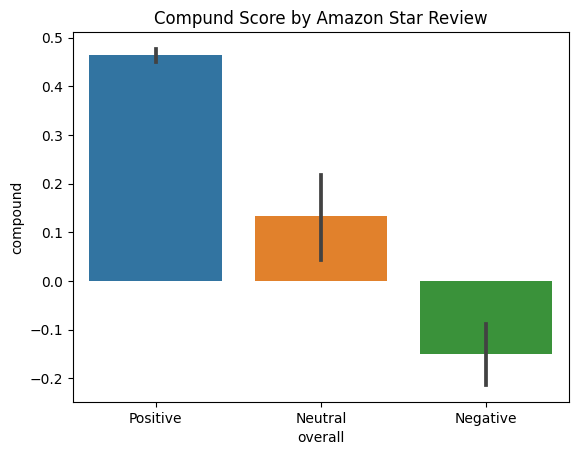

In [34]:
#plot VADER Results
ax = sns.barplot(data=vaders, x='overall', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

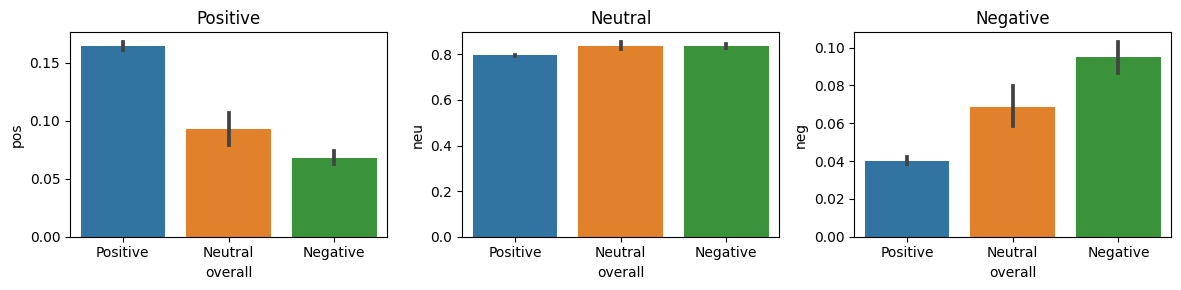

In [35]:
#visualizing results
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='overall', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='overall', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='overall', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1,2)).fit(df['reviewText'])
sparse_matrix = vect.fit_transform(df['reviewText'][:2000])

In [52]:
X = df['reviewText']
y= df['overall']
X = vect.transform(X)

In [53]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [54]:
print('Size of x_train:',(X_train.shape))
print('Size of y_train:',(y_train.shape))
print('Size of x_test:',(X_test.shape))
print('Size of y_test:',(y_test.shape))

Size of x_train: (3930, 46105)
Size of y_train: (3930,)
Size of x_test: (983, 46105)
Size of y_test: (983,)


In [55]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import LinearSVC
LSVClassifier = LinearSVC()

In [56]:
LSVClassifier.fit(X_train,y_train)

#Model Evaluation
print("Confusion Matrix")
matrix = confusion_matrix(y_test, LSVClassifier.predict(X_test))
print(matrix)

# Classification Report
print("\nClassification Report")
report = classification_report(y_test, LSVClassifier.predict(X_test))
print(report)

# Accuracy of the model
accuracy = accuracy_score(y_test, LSVClassifier.predict(X_test))
print('LSV Classifier Accuracy of the model: {:.2f}%'.format(accuracy*100))

Confusion Matrix
[[ 35   5  28]
 [  4   1  20]
 [  4   7 879]]

Classification Report
              precision    recall  f1-score   support

    Negative       0.81      0.51      0.63        68
     Neutral       0.08      0.04      0.05        25
    Positive       0.95      0.99      0.97       890

    accuracy                           0.93       983
   macro avg       0.61      0.51      0.55       983
weighted avg       0.92      0.93      0.92       983

LSV Classifier Accuracy of the model: 93.08%


In [59]:
#Training the model
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

#Caluclating the accuracy score of the model
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print("Accuracuy Score: ",accuracy_score)

Accuracuy Score:  0.9043743641912513
